In [61]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import relevant data
us_map = gpd.read_file("us_shape/s_08mr23.shp")
stats = pd.read_csv("banklist.csv")

# Reorganize Data
stats.rename(columns={'State': 'STATE', "Bank Name": "Count"}, inplace=True)
stats = stats.groupby(by="STATE").count()
stats.drop(columns=["City", "Cert", "Acquiring Institution", "Closing Date", "Fund"], inplace=True)

# Ensure all states are accounted for
all_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
all_states = pd.DataFrame(all_states, columns=["STATE"])
df = all_states.merge(stats, on='STATE', how='left').fillna(0)

# Convert counts from float to int
df['Count'] = df['Count'].apply(np.int64)

# Merge Data with map
map_and_stats = us_map.merge(df, on="STATE")

# Create a new df for use later
cwfn = map_and_stats.copy()
cwfn.drop(columns=["STATE", "FIPS", "LON", "LAT", "geometry"], inplace=True)

In [62]:
print("State with the most bank failures")
cwfn[cwfn["Count"] == cwfn["Count"].max()]

State with the most bank failures


,NAME,Count
8,Georgia,93


In [63]:
print("States with the least bank failures")
cwfn[cwfn["Count"] == cwfn["Count"].min()]

States with the least bank failures


,NAME,Count
6,Delaware,0
18,Maine,0
22,Montana,0
24,North Dakota,0
35,Rhode Island,0
41,Vermont,0
49,Alaska,0


In [69]:
print("States with the average number of bank failures")
cwfn[cwfn["Count"] == round(cwfn["Count"].mean())]

States with the average number of bank failures


,NAME,Count
14,Kansas,11
43,Wisconsin,11


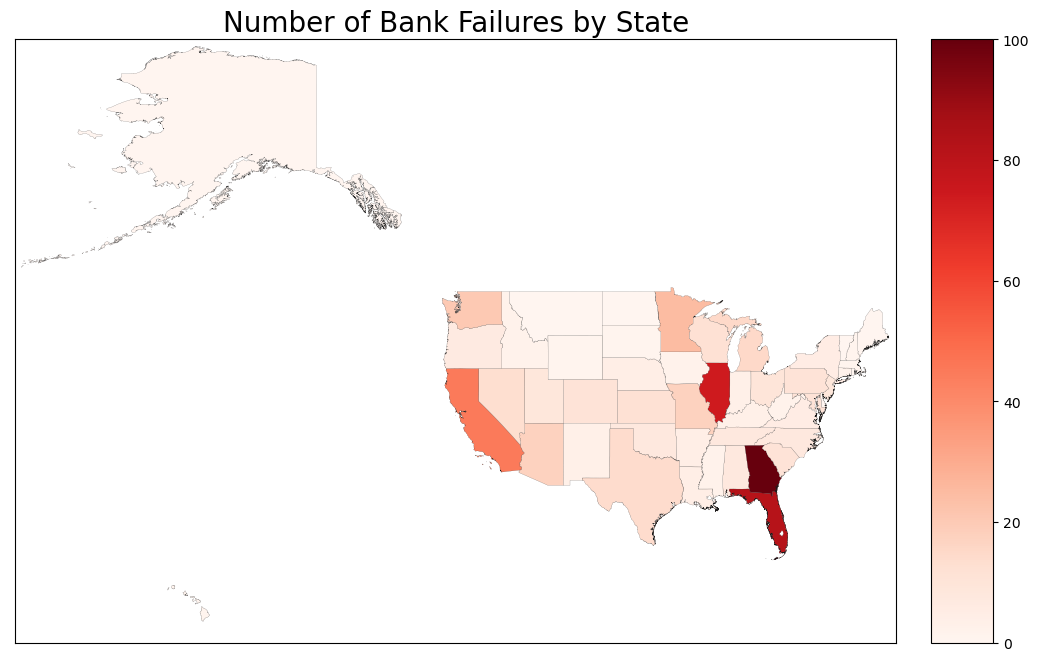

In [65]:
def plot_map(title, xlim=(-180, -66), ylim=(17, 72)):
    # Plot Data
    fig, ax = plt.subplots(1, figsize=(15, 15))
    plt.title(title, fontsize=20)
    map_and_stats.plot(column="Count", cmap="Reds", linewidth=0.1, ax=ax, edgecolor=".1")
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])

    # Colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=-1.50)
    fig.colorbar(sm, cax=cax)

    # Axies
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xticks([])
    ax.set_yticks([])

plot_map("Number of Bank Failures by State")

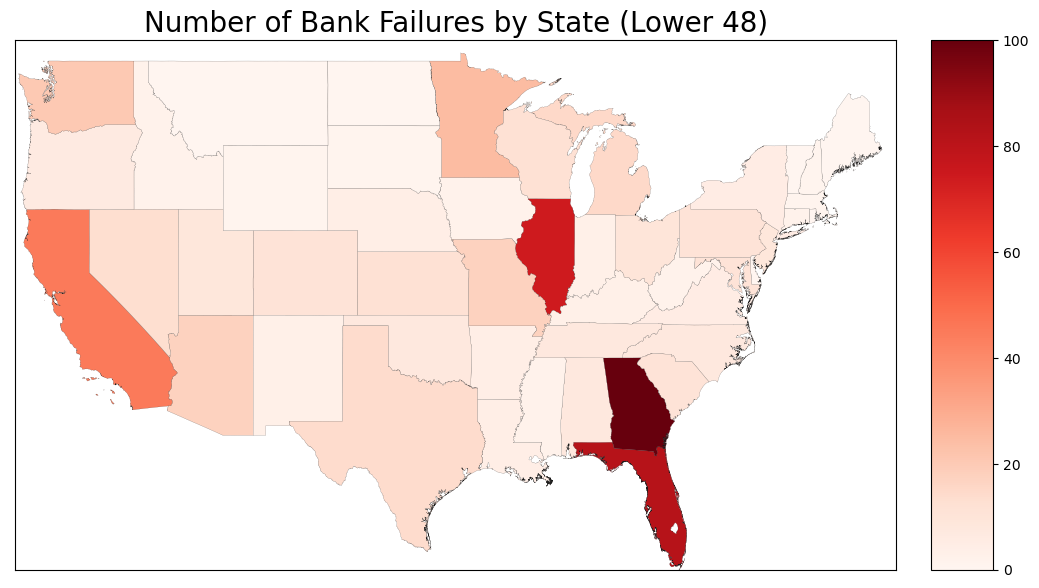

In [66]:
plot_map("Number of Bank Failures by State (Lower 48)", xlim=(-125, -66), ylim=(25, 50))